Here we make geo plots to show the localization of our collaborators

based on https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [49]:
! pip install geopandas pygeos

     |████████████████████████████████| 2.2 MB 12.6 MB/s eta 0:00:01


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [4]:
df_path='../table/Affiliation.tsv'
df = pd.read_csv(df_path, sep='\t')
df[['Latitude','Longitude']] = df['Lat.Long'].str.split(',',expand=True)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [32]:
gdf.Country.unique()

array(['The Netherlands', 'France', 'Australia', 'USA', 'Canada',
       'Germany', 'United States', 'Finland', 'Switzerland', 'Mexico',
       'UK', 'India', 'Japan', 'Ireland', 'Belgium', 'Italy', 'Spain',
       'China', 'Netherlands', 'Frace'], dtype=object)

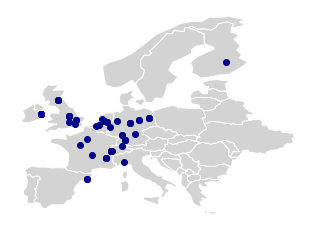

In [18]:
import pandas as pd
import geopandas
import pygeos
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


countries = ['The Netherlands', 'France', 'Germany', 'Finland', 'Switzerland','UK','Ireland', 'Belgium', 'Italy', 'Spain','Netherlands', 'Frace']
gdf_europe = gdf[gdf.Country.isin(countries)]


europe=world[world.continent=="Europe"]
europe=europe[(europe.name!="Russia") & (europe.name!="Iceland")]

# Create a custom polygon
polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
europe=geopandas.clip(europe, polygon) 
ax = europe.plot(color='lightgrey', edgecolor='white')
gdf_europe.plot(ax=ax,color='darkblue')
plt.axis('off')
plt.show()

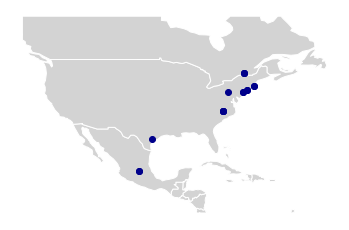

In [22]:
countries = ['USA', 'Canada', 'Mexico']
gdf_namerica = gdf[gdf.Country.isin(countries)]


namerica=world[world.continent=="North America"]

#Polygon([(-25,35), (40,35), (40,75),(-25,75)])
# Create a custom polygon
polygon = Polygon([(-130,10), (-35,10),(-35,60), (-130,60)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
namerica=geopandas.clip(namerica, polygon) 
ax = namerica.plot(color='lightgrey', edgecolor='white')
gdf_namerica.plot(ax=ax,color='darkblue')
plt.axis('off')
plt.show()

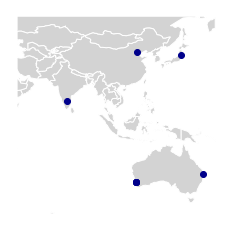

In [29]:
countries = ['Australia',  'India', 'Japan',  'China',]
gdf_australiasia = gdf[gdf.Country.isin(countries)]


australasia=world

polygon = Polygon([(50,-50), (160,-50),(160,60), (50,60)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
australasia=geopandas.clip(australasia, polygon) 
ax = australasia.plot(color='lightgrey', edgecolor='white')
gdf_australiasia.plot(ax=ax,color='darkblue')
plt.axis('off')
plt.show()